In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("StudentsPerformance.csv")


In [3]:
df.shape


(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
missing_percent=(df.isnull().sum()/len(df))*100

In [10]:
num_cols=df.select_dtypes(include=np.number).columns

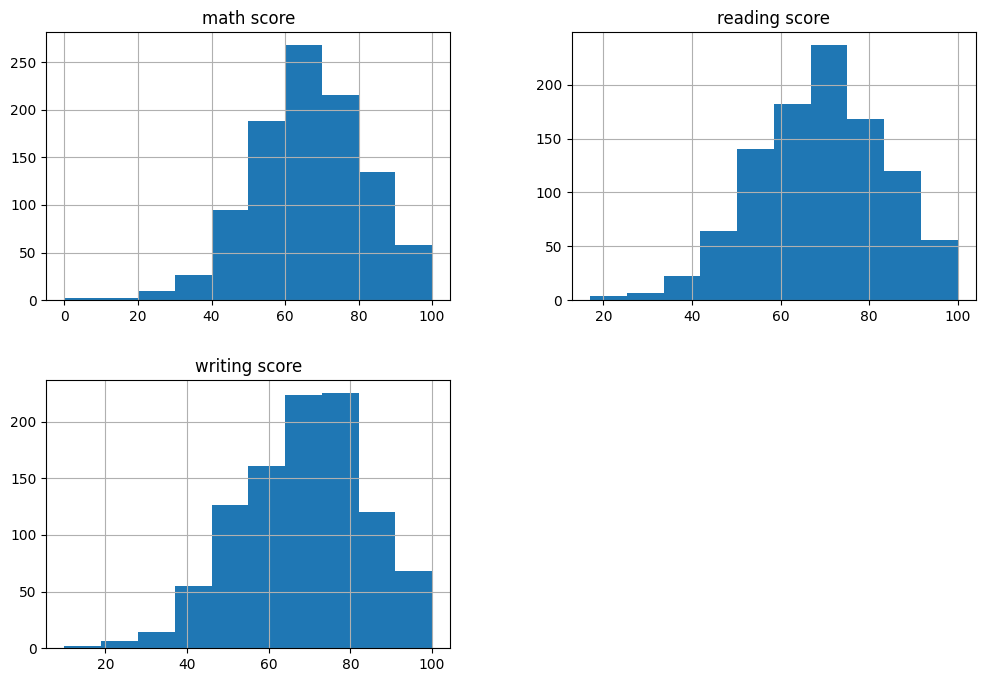

In [11]:
df[num_cols].hist(figsize=(12,8))
plt.show()

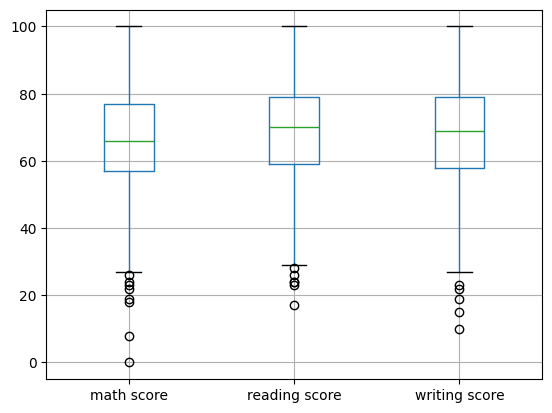

In [12]:
df[num_cols].boxplot()
plt.show()

In [14]:
col=num_cols[0]

In [16]:
Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1

In [17]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [18]:
df[col+"_outlier"]=((df[col]<lower)|(df[col]>upper)).astype(int)

In [19]:
df[col]=np.where(df[col]<lower,lower,np.where(df[col]>upper,upper,df[col]))

In [21]:
corr=df[num_cols].corr()

In [24]:
df.select_dtypes(include='number').corr()

,math score,reading score,writing score,math score_outlier
math score,1.000000,0.815908,0.800008,-0.235812
reading score,0.815908,1.000000,0.954598,-0.223348
writing score,0.800008,0.954598,1.000000,-0.234611
math score_outlier,-0.235812,-0.223348,-0.234611,1.000000


In [25]:
df.to_csv("cleaned_dataset.csv",index=False)